In [1]:
import glob
import natsort
import datetime
import useful_functions as uf

## OMPS UV Aerosol Index 
#### SWATHS to GLOBAL GRIDS

In [ ]:
# Define your input and output path here:
input_path  = f""
output_path = f""

In [3]:

# Define date range
start_date = datetime.date(2025, 10, 1)
end_date = datetime.date(2025, 10, 2)  # Inclusive
date_list = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Loop through each day
for obs_date in date_list:
    obs_date_md = obs_date.strftime("%m%d")
    obs_date_ = obs_date.strftime("%d %b %Y")
    obs_date_str = obs_date.strftime("%Y%m%d")

    paths_omps = natsort.natsorted(glob.glob(
        input_path + f"OMPS-NPP_NMMIEAI-L2-p000_{obs_date.year}m{obs_date_md}*.h5"))
    #print(paths_omps)
    
    uvai_mean, uvai_max = uf.swaths_to_grd(paths_omps)    
    ds = uf.create_nc_dataset(obs_date, uvai_mean, uvai_max)
    ds_out = output_path + f"{obs_date_str}_OMPS-NPP_NMMIEAI-L2_UVAI.nc"
    ds.to_netcdf(ds_out, format='NETCDF4')
    #print("Dataset saved to: ", ds_out)

In [40]:
import plotting as p

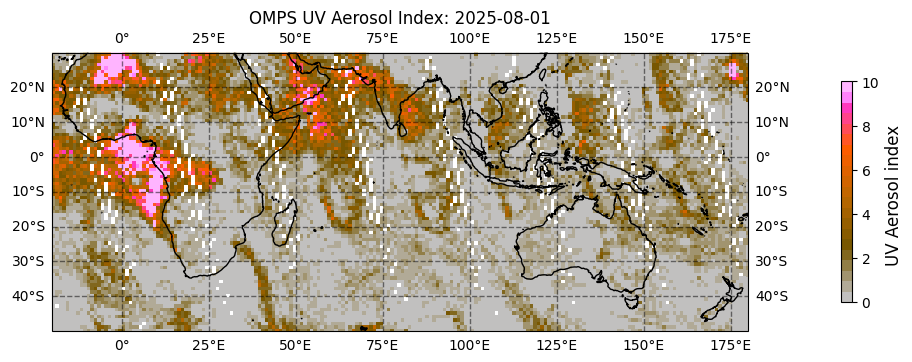

In [41]:
lon_min = -20
lon_max = 180
lat_min = -50
lat_max = 30
extent = [lon_min, lon_max, lat_min, lat_max]
fig, ax = p.plot_uvai_global_grd(ds, obs_date, extent)
